In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Selecting stock symbol
tickerSymbol = 'AAPL'
data = yf.Ticker(tickerSymbol)
data

yfinance.Ticker object <AAPL>

In [3]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days = 730)
tommorrow = end_date + datetime.timedelta(days=1)
prices = data.history(start = start_date , end = end_date).Close
prices

Date
2022-01-27 00:00:00-05:00    157.421356
2022-01-28 00:00:00-05:00    168.405853
2022-01-31 00:00:00-05:00    172.805557
2022-02-01 00:00:00-05:00    172.637497
2022-02-02 00:00:00-05:00    173.853592
                                ...    
2024-01-22 00:00:00-05:00    193.889999
2024-01-23 00:00:00-05:00    195.179993
2024-01-24 00:00:00-05:00    194.500000
2024-01-25 00:00:00-05:00    194.169998
2024-01-26 00:00:00-05:00    192.419998
Name: Close, Length: 502, dtype: float64

In [4]:
# Calculate returns
returns = prices.pct_change().dropna()
returns

Date
2022-01-28 00:00:00-05:00    0.069778
2022-01-31 00:00:00-05:00    0.026126
2022-02-01 00:00:00-05:00   -0.000973
2022-02-02 00:00:00-05:00    0.007044
2022-02-03 00:00:00-05:00   -0.016720
                               ...   
2024-01-22 00:00:00-05:00    0.012163
2024-01-23 00:00:00-05:00    0.006653
2024-01-24 00:00:00-05:00   -0.003484
2024-01-25 00:00:00-05:00   -0.001697
2024-01-26 00:00:00-05:00   -0.009013
Name: Close, Length: 501, dtype: float64

Text(0.5, 1.0, 'Stock Prices')

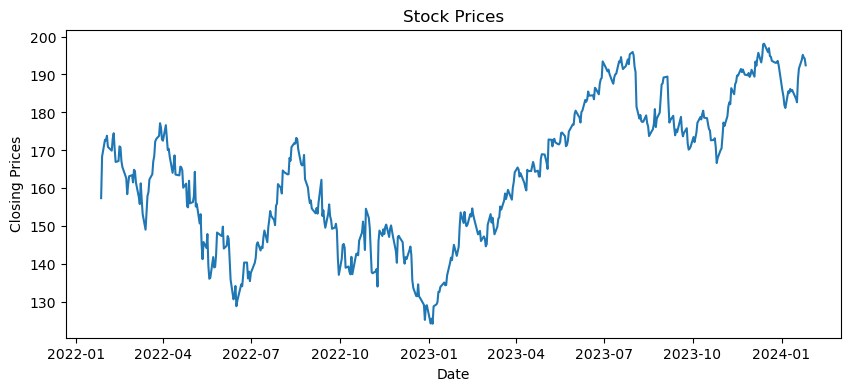

In [5]:
#Plot the stock prices
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.title('Stock Prices')


Text(0.5, 1.0, 'Returns of TCS')

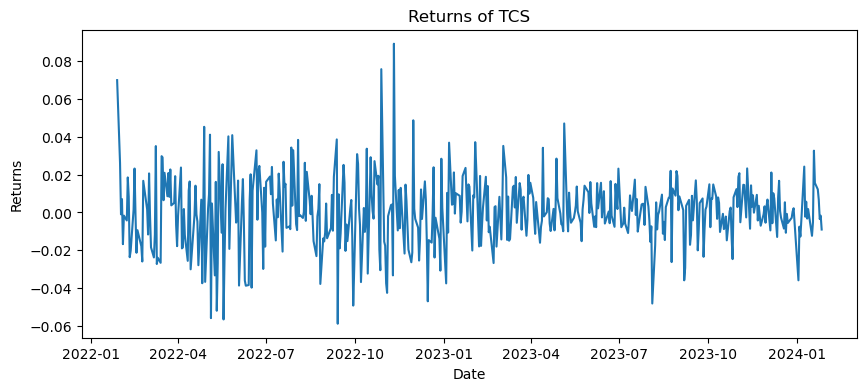

In [6]:
#Plotting the returns 

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns')
plt.xlabel('Date')
plt.title('Returns of TCS')


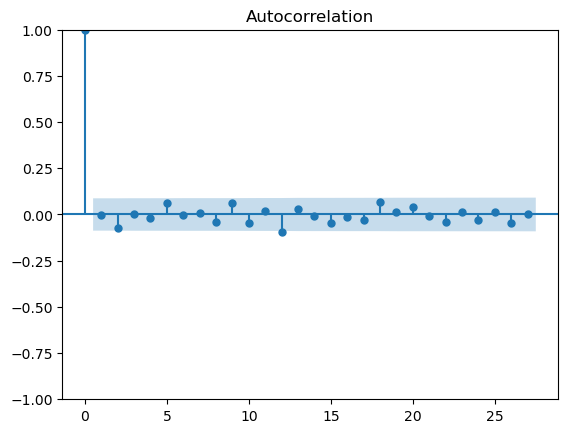

In [7]:
#Plotting the (MA)acf and pacf(AR)
plot_acf(returns)
plt.show()



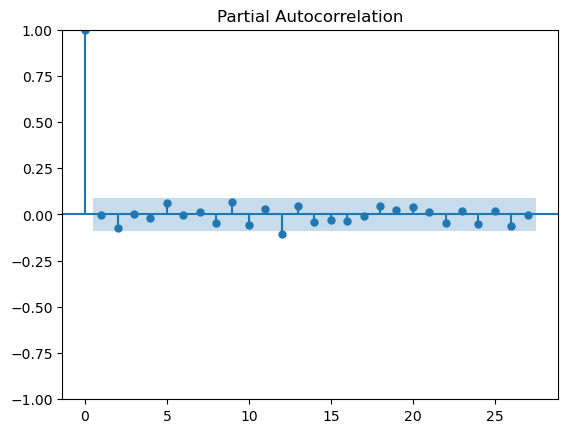

In [8]:
plot_pacf(returns, method = 'ywm')
plt.show()

In [9]:
#Building the model of ARIMA 

model = ARIMA(prices, order=(7,0,6))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  502
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -1233.230
Date:                Sat, 27 Jan 2024   AIC                           2496.460
Time:                        09:58:10   BIC                           2559.739
Sample:                             0   HQIC                          2521.286
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.6443     12.632     12.955      0.000     138.887     188.402
ar.L1          0.0491      1.411      0.035      0.972      -2.716       2.814
ar.L2          0.4234      0.759      0.558      0.5

In [10]:
#Predicting the next day prices

next_day_prices = fitted.forecast(100, alpha=0.05)
print(next_day_prices)

502    192.259212
503    192.029015
504    191.430190
505    191.201074
506    190.668275
          ...    
597    174.453040
598    174.343788
599    174.235586
600    174.128503
601    174.022532
Name: predicted_mean, Length: 100, dtype: float64


In [11]:
predicted_price = next_day_prices.values[0]
print(f'The predicted price for {tommorrow} (tommorrow)', predicted_price)

The predicted price for 2024-01-28 (tommorrow) 192.25921226922065
